#### 2. Multiclass classification using Deep Neural Networks: Example: Use the OCR letter recognition dataset

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential  # type: ignore
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

In [51]:
import requests

url = 'https://archive.ics.uci.edu/static/public/59/letter+recognition.zip'
filename = 'letter+recognition.zip'

response = requests.get(url)
with open(filename, 'wb') as f:
    f.write(response.content)

In [ ]:
import zipfile 
# this is optional instead just extract the zip folder downloaded in the dir

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('letter_recognition')

In [53]:
df = pd.read_csv('./letter_recognition/letter-recognition.data', header=None)

In [54]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [55]:
df[0] = df[0].apply(lambda x: ord(x) - ord('A'))

In [56]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [57]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [58]:
y = to_categorical(y, num_classes=26) #one-hot encoding

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])

In [62]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [63]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
400/400 [==============================] - 1s 1ms/step - loss: 2.0862 - accuracy: 0.3950 - val_loss: 1.1743 - val_accuracy: 0.6875
Epoch 2/30
400/400 [==============================] - 0s 1ms/step - loss: 1.2530 - accuracy: 0.6119 - val_loss: 0.8957 - val_accuracy: 0.7544
Epoch 3/30
400/400 [==============================] - 0s 1ms/step - loss: 1.0534 - accuracy: 0.6752 - val_loss: 0.7655 - val_accuracy: 0.7847
Epoch 4/30
400/400 [==============================] - 0s 1ms/step - loss: 0.9591 - accuracy: 0.7011 - val_loss: 0.6893 - val_accuracy: 0.8028
Epoch 5/30
400/400 [==============================] - 0s 1ms/step - loss: 0.8698 - accuracy: 0.7261 - val_loss: 0.6219 - val_accuracy: 0.8272
Epoch 6/30
400/400 [==============================] - 0s 1ms/step - loss: 0.8046 - accuracy: 0.7511 - val_loss: 0.5804 - val_accuracy: 0.8363
Epoch 7/30
400/400 [==============================] - 0s 1ms/step - loss: 0.7686 - accuracy: 0.7559 - val_loss: 0.5389 - val_accuracy: 0.8450
Epoch 

In [65]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Loss: 0.2455
Test Accuracy: 92.55%


In [66]:
predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1)
y_true = y_test.argmax(axis=1)

125/125 [==============================] - 0s 567us/step


In [70]:
print("classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[chr(i) for i in range(ord('A'), ord('Z')+1)]))

classification Report:

              precision    recall  f1-score   support

           A       0.95      0.97      0.96       149
           B       0.81      0.94      0.87       153
           C       0.99      0.91      0.95       137
           D       0.88      0.94      0.91       156
           E       0.88      0.93      0.90       141
           F       0.89      0.90      0.90       140
           G       0.89      0.94      0.91       160
           H       0.92      0.78      0.84       144
           I       0.91      0.92      0.92       146
           J       0.96      0.91      0.93       149
           K       0.93      0.88      0.91       130
           L       0.98      0.90      0.94       155
           M       0.98      0.96      0.97       168
           N       0.99      0.91      0.94       151
           O       0.89      0.92      0.90       145
           P       0.95      0.91      0.93       173
           Q       0.98      0.98      0.98       166
   

In [71]:
model.save('ocr_multiclass_model.keras')

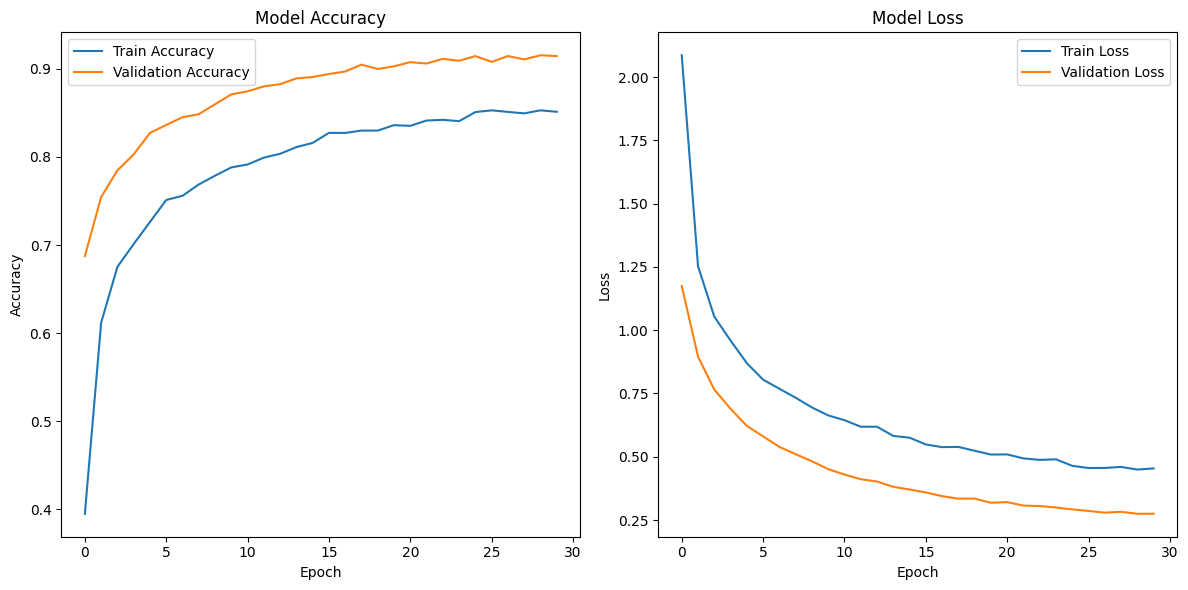

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

plt.show()